In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\chitv\Desktop\datasets-master\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\Census Income\adult.data.csv",header=None)
df_test=pd.read_csv(r'C:\Users\chitv\Desktop\datasets-master\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\Census Income\adult.test.csv', header=None, skiprows=1)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
cols=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [5]:
df.columns=cols
df_test.columns= cols

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape

(32561, 15)

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [10]:
X_train= df.drop('income',axis=1)
y_train=df['income']

In [11]:
X_test= df_test.drop('income',axis=1)
y_test= df_test['income']

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32537, 14), (32537,), (16276, 14), (16276,))

In [13]:
y_test.value_counts()

 <=50K.    12430
 >50K.      3846
Name: income, dtype: int64

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.7+ MB


In [15]:
cat_columns= ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
numeric_columns= ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

Label Encoding

In [16]:
le = LabelEncoder()

for i in range(0,X_train.shape[1]):
    if X_train.dtypes[i]=='object':
        X_train[X_train.columns[i]] = le.fit_transform(X_train[X_train.columns[i]])

for i in range(0,X_test.shape[1]):
    if X_test.dtypes[i]=='object':
        X_test[X_test.columns[i]] = le.fit_transform(X_test[X_test.columns[i]])        

In [17]:
y_train=le.fit_transform(y_train)
y_test= le.fit_transform(y_test)

MinMaxScaler

In [18]:
scaler=MinMaxScaler()
X_train[numeric_columns]= scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns]= scaler.fit_transform(X_test[numeric_columns])

In [19]:
y_train=le.fit_transform(y_train)
y_test= le.fit_transform(y_test)

In [20]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,1,0.02174,0.0,0.397959,39
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,1,0.00000,0.0,0.122449,39
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,1,0.00000,0.0,0.397959,39
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,1,0.00000,0.0,0.397959,39
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0,0.00000,0.0,0.397959,5


Model Prediction and Evaluation

In [21]:
model= SVC()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy Score using Support Vector Machine Clasifier: ", round(accuracy,4))

Accuracy Score using Support Vector Machine Clasifier:  0.7637


In [22]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred2= model2.predict(X_test)
accuracy2= accuracy_score(y_test,y_pred2)
print("Accuracy Score using Decision Tree Clasifier: ", round(accuracy2,4))

Accuracy Score using Decision Tree Clasifier:  0.7908


In [23]:
model3= RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred3= model3.predict(X_test)
accuracy3= accuracy_score(y_test, y_pred3)
print("Accuracy Score using Random Forest Clasifier: ", round(accuracy3,4))

Accuracy Score using Random Forest Clasifier:  0.8468


In [24]:
accuracies= [accuracy,accuracy2,accuracy3]

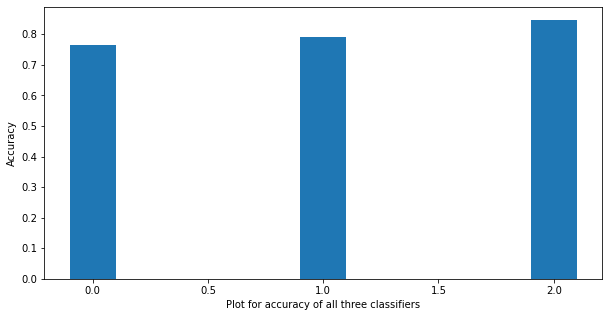

In [25]:
fig= plt.figure(figsize= (10,5))
plt.bar(range(len(accuracies)),accuracies,width=0.2)
plt.xlabel("Plot for accuracy of all three classifiers")
plt.ylabel("Accuracy")
plt.show()